# Spotify Hit Predictor model for 10's Dataset

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('dark_background')

### Load Dataset

In [2]:
df = pd.read_csv('dataset-of-10s.csv')
df.head

<bound method NDFrame.head of                                     track                          artist  \
0                             Wild Things                    Alessia Cara   
1                               Surfboard                       Esquivel!   
2                            Love Someone                    Lukas Graham   
3     Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4           Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   
...                                   ...                             ...   
6393                        Lotus Flowers                           Yolta   
6394                    Calling My Spirit                     Kodak Black   
6395                        Teenage Dream                      Katy Perry   
6396                       Stormy Weather                  Oscar Peterson   
6397                                 Dust                     Hans Zimmer   

                                       uri  d

In [3]:
df.shape

(6398, 19)

6398 smaples having 19 features.

### Shuffle The Data

In [4]:
df = df.sample(frac = 1)

### Balance The Dataset


#### Dropping Categorical features

In [5]:
X = df.drop(['target', 'track', 'artist', 'uri'], axis=1)

In [6]:
X.shape

(6398, 15)

Modified dataframe X


In [7]:
Y = df['target']

Now lets check if hits and flops counts are balanced

In [8]:
hit_flop_count = Y.value_counts()

In [9]:
hit_flop_count

1    3199
0    3199
Name: target, dtype: int64

We observe that dataset target values of hits and flops are well balanced.i.e, equal.

In [10]:
Y = Y.values

### Standardize The Inputs

In [11]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Split The Dataset into Train,Validation and Test

Training and Testing split (ratio of 90% to 10% respectively)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.1, random_state=1)

Training and Validation split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [14]:
x_train.shape, x_test.shape, x_val.shape

((5118, 15), (640, 15), (640, 15))

### Create The Deep Learning Algorithm

Using standard notations used globally for training neural networks

In [15]:
nn = 200 #number of neurons in hidden layers
target_count = 2

In [16]:
model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Flatten())

In [17]:
model_10.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_10.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_10.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [18]:
model_10.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [19]:
model_10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the model

In [20]:
model_fit = model_10.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
52/52 [==============================] - 1s 14ms/step - loss: 0.4638 - accuracy: 0.7784 - val_loss: 0.4059 - val_accuracy: 0.8078
Epoch 2/20
52/52 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.8249 - val_loss: 0.4053 - val_accuracy: 0.8141
Epoch 3/20
52/52 [==============================] - 0s 4ms/step - loss: 0.3730 - accuracy: 0.8327 - val_loss: 0.4011 - val_accuracy: 0.8141
Epoch 4/20
52/52 [==============================] - 0s 5ms/step - loss: 0.3622 - accuracy: 0.8380 - val_loss: 0.3993 - val_accuracy: 0.8062
Epoch 5/20
52/52 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8468 - val_loss: 0.4050 - val_accuracy: 0.8062
Epoch 6/20
52/52 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8509 - val_loss: 0.4179 - val_accuracy: 0.8078
Epoch 7/20
52/52 [==============================] - 0s 4ms/step - loss: 0.3301 - accuracy: 0.8517 - val_loss: 0.4117 - val_accuracy: 0.8109
Epoch 8/20
52/52 [=

In [21]:
#Storing the predictions
predictions = model_10.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

In [22]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

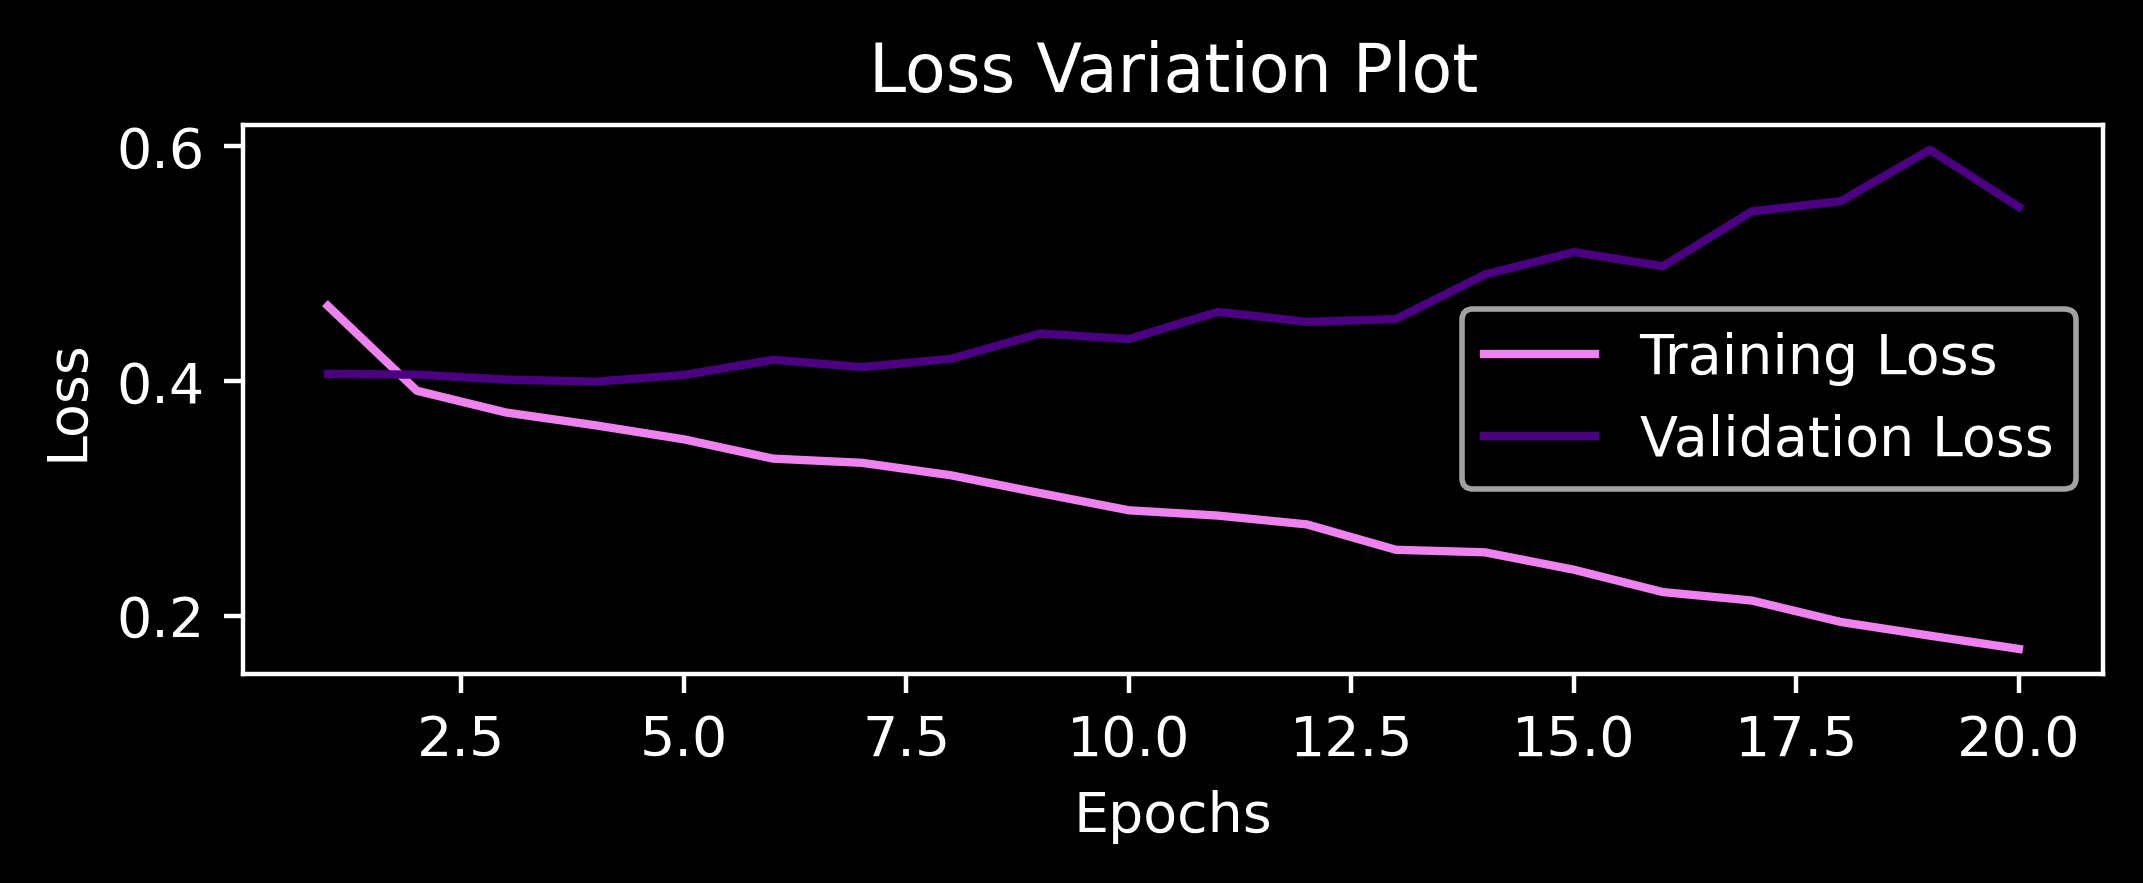

In [23]:
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Accuracy Variation Plot

In [24]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

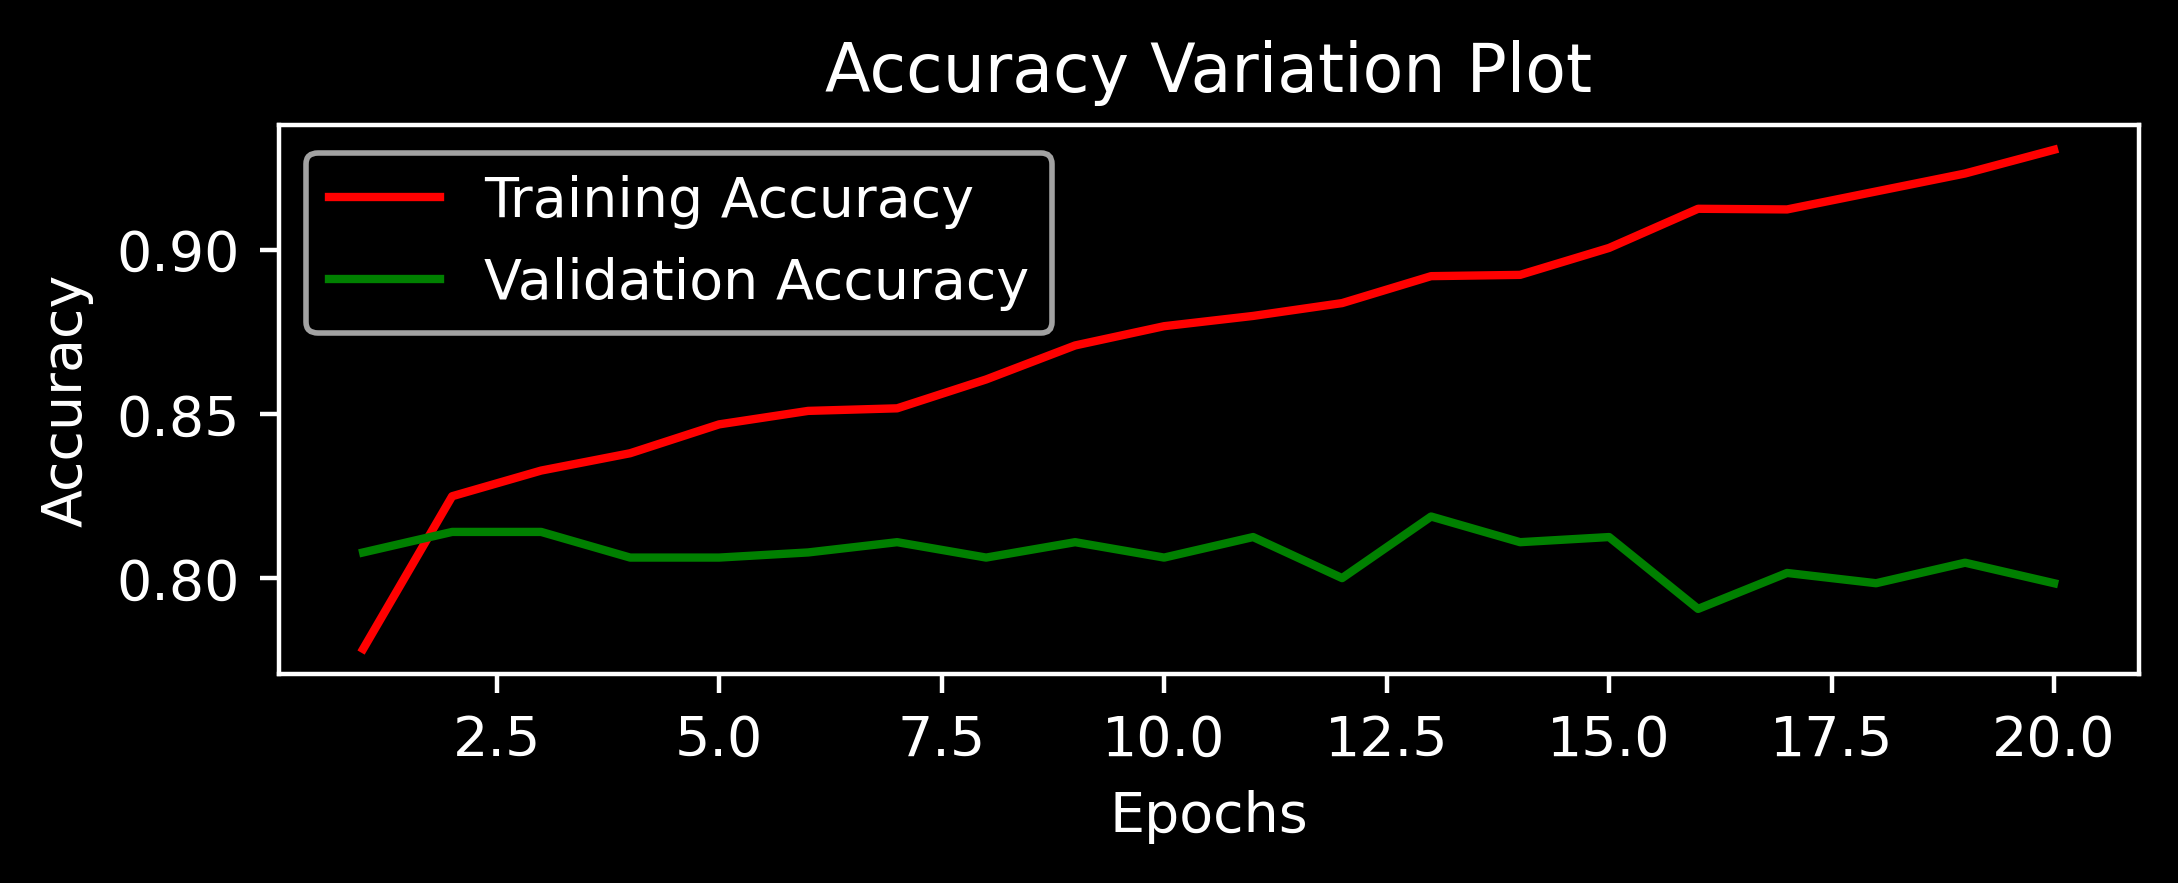

In [25]:
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Test The Model

In [26]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[9.9999952e-01 4.4953302e-07]
Predicted: 0
Original: 0


### Saving model and Verifying

In [27]:
model_10.save('Trained_model_10')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_10\assets


In [28]:
model = tf.keras.models.load_model('Trained_model_10')
print(x_test[1])

[ 0.51200199  0.05086579 -0.07862763  0.17630188  0.74104827 -0.65851144
  0.0743622  -0.51862874  0.91070454 -0.74762714  0.08578067  0.17426998
  0.18303334 -0.10125817 -0.08382653]


In [29]:
print(x_test[1].reshape( 1,-1))

[[ 0.51200199  0.05086579 -0.07862763  0.17630188  0.74104827 -0.65851144
   0.0743622  -0.51862874  0.91070454 -0.74762714  0.08578067  0.17426998
   0.18303334 -0.10125817 -0.08382653]]


In [30]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.01781145 0.9821885 ]]
